In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/processed/news_clean.csv")

In [7]:
df["clean_text"] = df["clean_text"].fillna("")


In [ ]:
X = df["clean_text"].astype(str)  
y = df["label"]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [13]:
X_train_bow.shape

(35918, 5000)

In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

In [15]:
y_pred = nb_model.predict(X_test_bow)


In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9546770601336303

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4696
           1       0.94      0.96      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.96      0.95      8980
weighted avg       0.95      0.95      0.95      8980



In [ ]:
joblib.dump(nb_model, "../models/naive_bayes_model.pkl")
joblib.dump(vectorizer, "")

['../models/bow_vectorizer.pkl']

In [19]:
# تحميل الموديل
nb_model_loaded = joblib.load("../models/naive_bayes_model.pkl")

# تحميل الـ vectorizer
vectorizer_loaded = joblib.load("../models/bow_vectorizer.pkl")

# تجربة على نص جديد
sample_text = ["Donald Trump sends out disturbing New Year’s Eve message"]
sample_bow = vectorizer_loaded.transform(sample_text)
prediction = nb_model_loaded.predict(sample_bow)

print("Prediction:", "Fake" if prediction[0] == 1 else "Real")


Prediction: Real


In [22]:
sample_text3 = ["Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends,"]
sample_bow3 = vectorizer_loaded.transform(sample_text3)
prediction3 = nb_model_loaded.predict(sample_bow3)

print("Prediction:", "Fake" if prediction3[0] == 1 else "Real")


Prediction: Fake


In [24]:
import numpy as np

# ناخد كل الكلمات اللي في الـ vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# ناخد log probabilities من الموديل
class_labels = nb_model.classes_  # [0=Real, 1=Fake]
log_prob = nb_model.feature_log_prob_

# كلمات مرتبطة بـ Fake (class=1)
topn = 20
top_fake_idx = np.argsort(log_prob[1])[-topn:]
top_real_idx = np.argsort(log_prob[0])[-topn:]

print("🔥 Top words predicting FAKE news:")
print(feature_names[top_fake_idx])

print("\n✅ Top words predicting REAL news:")
print(feature_names[top_real_idx])


🔥 Top words predicting FAKE news:
['could' 'country' 'told' 'election' 'party' 'official' 'people' 'united'
 'also' 'new' 'house' 'year' 'government' 'republican' 'president'
 'reuters' 'would' 'state' 'trump' 'said']

✅ Top words predicting REAL news:
['news' 'new' 'also' 'hillary' 'say' 'american' 'video' 'republican'
 'donald' 'time' 'like' 'clinton' 'obama' 'state' 'would' 'one' 'people'
 'president' 'said' 'trump']


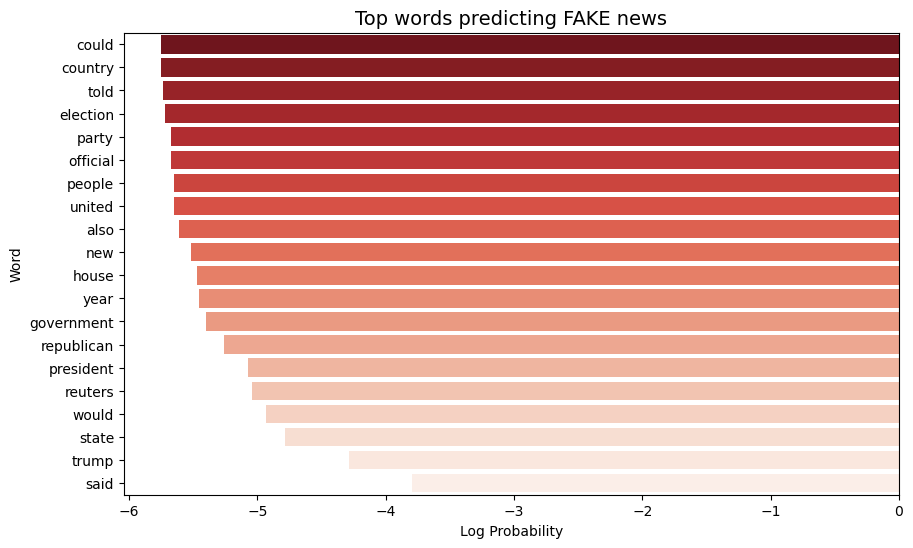

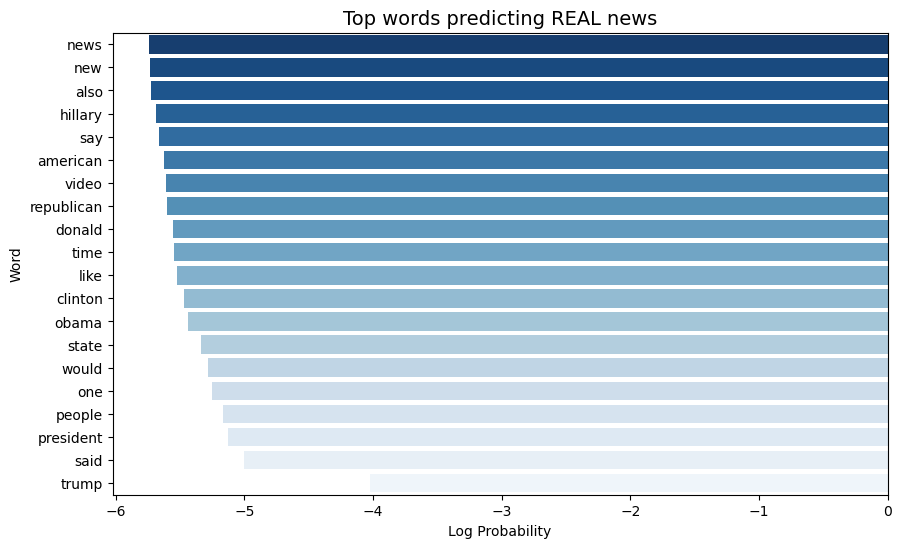

In [26]:
topn = 20  

# ناخد الكلمات و الـ log-prob لكل كلاس
top_fake_idx = np.argsort(log_prob[1])[-topn:]
top_real_idx = np.argsort(log_prob[0])[-topn:]

fake_words = feature_names[top_fake_idx]
real_words = feature_names[top_real_idx]

fake_scores = log_prob[1][top_fake_idx]
real_scores = log_prob[0][top_real_idx]

# Plot Fake
plt.figure(figsize=(10,6))
sns.barplot(x=fake_scores, y=fake_words, palette="Reds_r")
plt.title("Top words predicting FAKE news", fontsize=14)
plt.xlabel("Log Probability")
plt.ylabel("Word")
plt.show()

# Plot Real
plt.figure(figsize=(10,6))
sns.barplot(x=real_scores, y=real_words, palette="Blues_r")
plt.title("Top words predicting REAL news", fontsize=14)
plt.xlabel("Log Probability")
plt.ylabel("Word")
plt.show()